In [8]:
import pandas as pd
import random
import sklearn.decomposition as dp
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.manifold import TSNE

In [3]:
vol=pd.read_excel('波动率2021.xlsx')
vol.dropna(axis=0,inplace=True)
vol.set_index("证券代码")

industry_class=pd.read_excel('industry_classification.xlsx')
vol_ind=vol.merge(industry_class,on=['证券代码'])
vol_ind.set_index("证券代码")

,证券简称,2101,2102,2103,2104,2105,2106,2107,2108,2109,交易所,行业代码,公司简称,新版一级行业,新版二级行业,新版三级行业
证券代码,,,,,,,,,,,,,,,,
000001.SZ,平安银行,3.1943,3.6900,2.9436,2.0854,1.7454,1.7836,2.7768,2.5768,2.9402,A股,480301,平安银行,银行,股份制银行Ⅱ,股份制银行Ⅲ
000002.SZ,万科A,2.0391,2.8738,2.0595,1.2521,1.2134,0.9710,2.7647,2.7610,3.0689,A股,430101,万科A,房地产,房地产开发,住宅开发
000004.SZ,国华网安,3.5411,3.4833,1.8256,3.3435,1.9555,5.8723,5.5114,3.3007,3.1690,A股,710402,国华网安,计算机,软件开发,横向通用软件
000005.SZ,ST星源,1.8226,3.7278,4.2619,1.3192,3.0835,2.0852,2.9724,2.1412,2.2525,A股,760104,ST星源,环保,环境治理,综合环境治理
000006.SZ,深振业A,1.8816,2.2138,1.7248,1.1815,1.0114,0.5892,1.0761,1.1934,1.6550,A股,430101,深振业A,房地产,房地产开发,住宅开发
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688777.SH,中控技术,3.0088,2.6911,3.2606,2.6471,4.0160,2.6330,2.7673,4.3979,1.8668,A股,640702,中控技术,机械设备,自动化设备,工控设备
688788.SH,科思科技,4.0062,3.5766,2.1023,2.9591,2.4966,3.2475,4.2436,3.5622,2.8945,A股,650501,科思科技,国防军工,军工电子Ⅱ,军工电子Ⅲ
688819.SH,天能股份,16.1125,3.2661,2.7263,2.2545,1.9118,2.3166,5.5058,4.7363,2.1048,A股,630705,天能股份,电力设备,电池,蓄电池及其他电池


In [5]:
n=len(vol_ind)
industry=[]
for i in range(n-2):
    industry.append(vol_ind.iloc[i,14])

In [7]:
vol_clus=vol_ind.filter(regex="21")

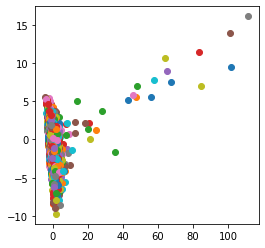

In [9]:
#PCA analysis
pca=dp.PCA(n_components=2)
pca_vol=pca.fit_transform(vol_clus)
pc1=[]
pc2=[]
for i in range(n):
    pc1.append(pca_vol[i][0])
    pc2.append(pca_vol[i][1])
plt.figure(figsize=(4,4))
for x,y,z in zip(pc1,pc2,industry):
    plt.scatter(x,y,label=z)
plt.legend
plt.show()

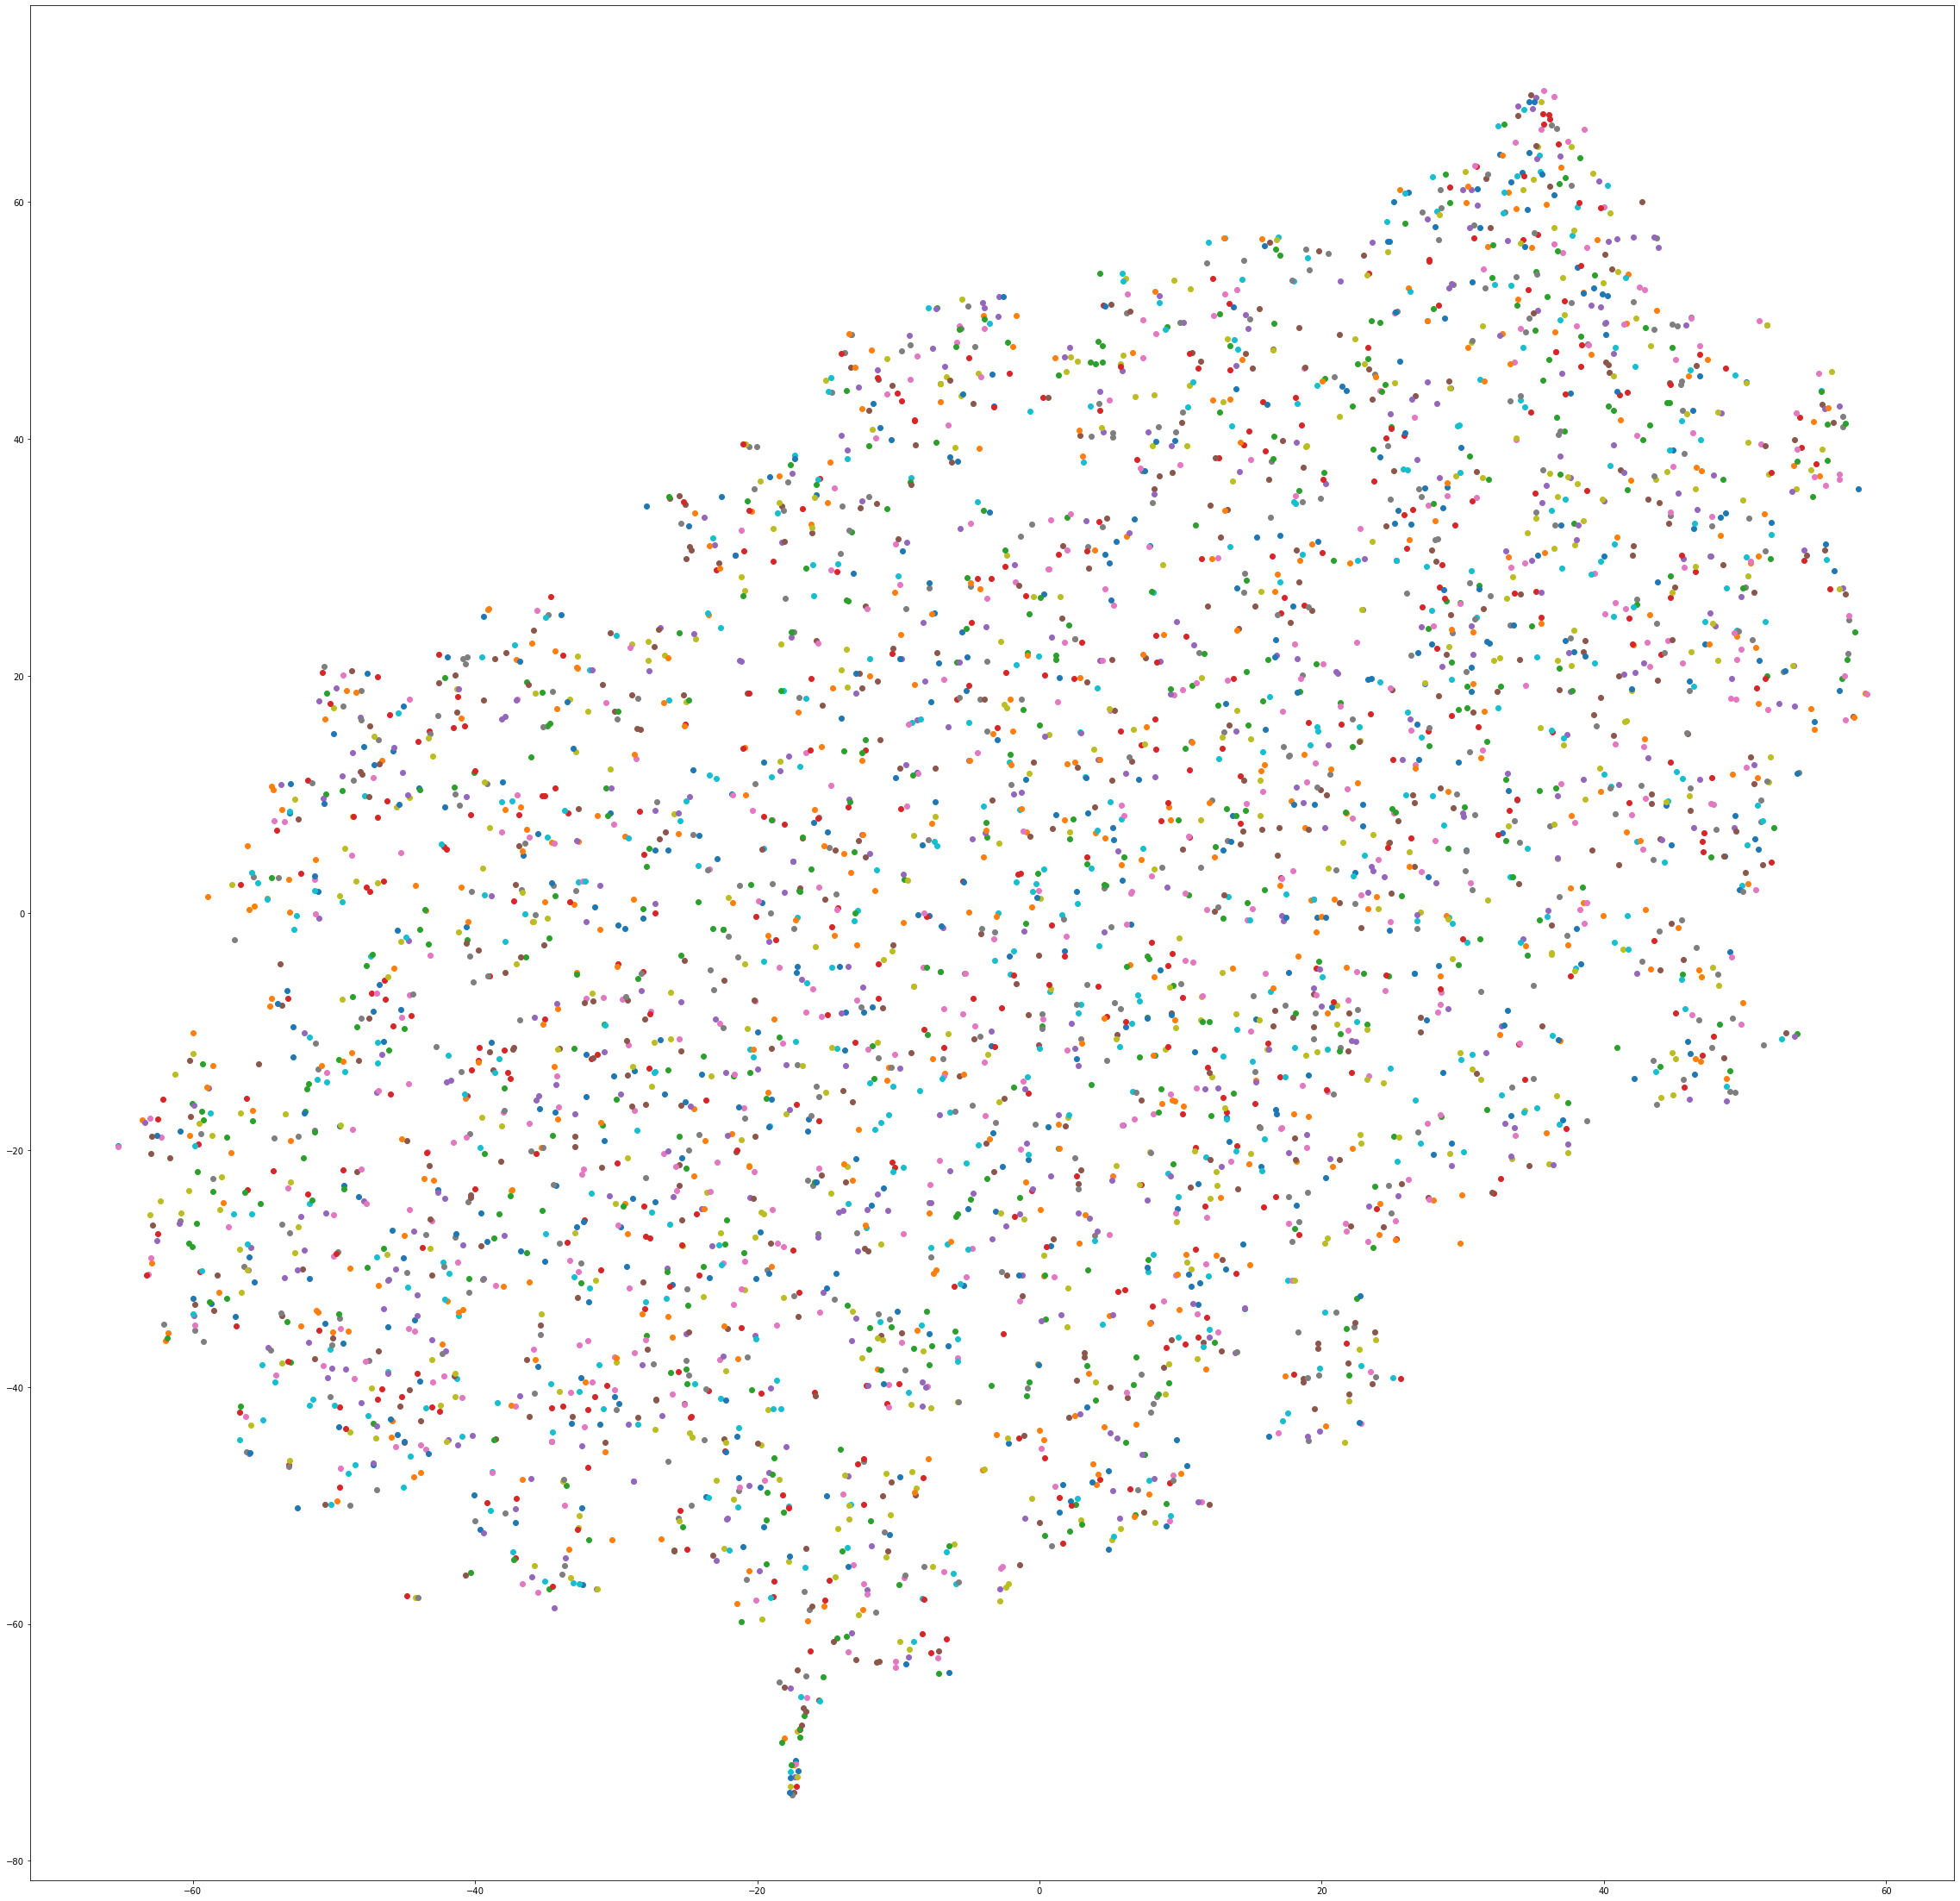

In [11]:
#t-SNE analysis
tsne=TSNE(n_components=2,random_state=0)
vol_2d=tsne.fit_transform(vol_clus)
target_ids=range(n)
tsne1=[]
tsne2=[]
for i in range(n):
    tsne1.append(vol_2d[i][0])
    tsne2.append(vol_2d[i][1])
plt.figure(figsize=(40,40))
for x,y,z in zip(tsne1,tsne2,industry):
    plt.scatter(x,y,label=z)
plt.legend
plt.show()

In [12]:
rev=pd.read_excel('return_rate.xlsx')
rev.dropna(axis=0,inplace=True)
rev.set_index("证券代码")

industry_class=pd.read_excel('industry_classification.xlsx')
rev_ind=vol.merge(industry_class,on=['证券代码'])
rev_ind.set_index("证券代码")

,证券简称,2101,2102,2103,2104,2105,2106,2107,2108,2109,交易所,行业代码,公司简称,新版一级行业,新版二级行业,新版三级行业
证券代码,,,,,,,,,,,,,,,,
000001.SZ,平安银行,3.1943,3.6900,2.9436,2.0854,1.7454,1.7836,2.7768,2.5768,2.9402,A股,480301,平安银行,银行,股份制银行Ⅱ,股份制银行Ⅲ
000002.SZ,万科A,2.0391,2.8738,2.0595,1.2521,1.2134,0.9710,2.7647,2.7610,3.0689,A股,430101,万科A,房地产,房地产开发,住宅开发
000004.SZ,国华网安,3.5411,3.4833,1.8256,3.3435,1.9555,5.8723,5.5114,3.3007,3.1690,A股,710402,国华网安,计算机,软件开发,横向通用软件
000005.SZ,ST星源,1.8226,3.7278,4.2619,1.3192,3.0835,2.0852,2.9724,2.1412,2.2525,A股,760104,ST星源,环保,环境治理,综合环境治理
000006.SZ,深振业A,1.8816,2.2138,1.7248,1.1815,1.0114,0.5892,1.0761,1.1934,1.6550,A股,430101,深振业A,房地产,房地产开发,住宅开发
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688777.SH,中控技术,3.0088,2.6911,3.2606,2.6471,4.0160,2.6330,2.7673,4.3979,1.8668,A股,640702,中控技术,机械设备,自动化设备,工控设备
688788.SH,科思科技,4.0062,3.5766,2.1023,2.9591,2.4966,3.2475,4.2436,3.5622,2.8945,A股,650501,科思科技,国防军工,军工电子Ⅱ,军工电子Ⅲ
688819.SH,天能股份,16.1125,3.2661,2.7263,2.2545,1.9118,2.3166,5.5058,4.7363,2.1048,A股,630705,天能股份,电力设备,电池,蓄电池及其他电池


In [14]:
n=len(vol_ind)
industry=[]
for i in range(n-2):
    industry.append(vol_ind.iloc[i,14])

In [15]:
rev_clus=rev_ind.filter(regex="21")

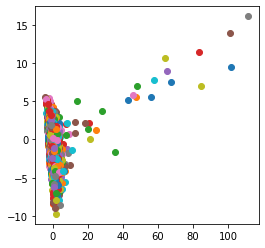

In [16]:
#PCA analysis
pca=dp.PCA(n_components=2)
pca_rev=pca.fit_transform(rev_clus)
pc1_rev=[]
pc2_rev=[]
for i in range(n):
    pc1_rev.append(pca_rev[i][0])
    pc2_rev.append(pca_rev[i][1])
plt.figure(figsize=(4,4))
for x,y,z in zip(pc1_rev,pc2_rev,industry):
    plt.scatter(x,y,label=z)
plt.legend
plt.show()

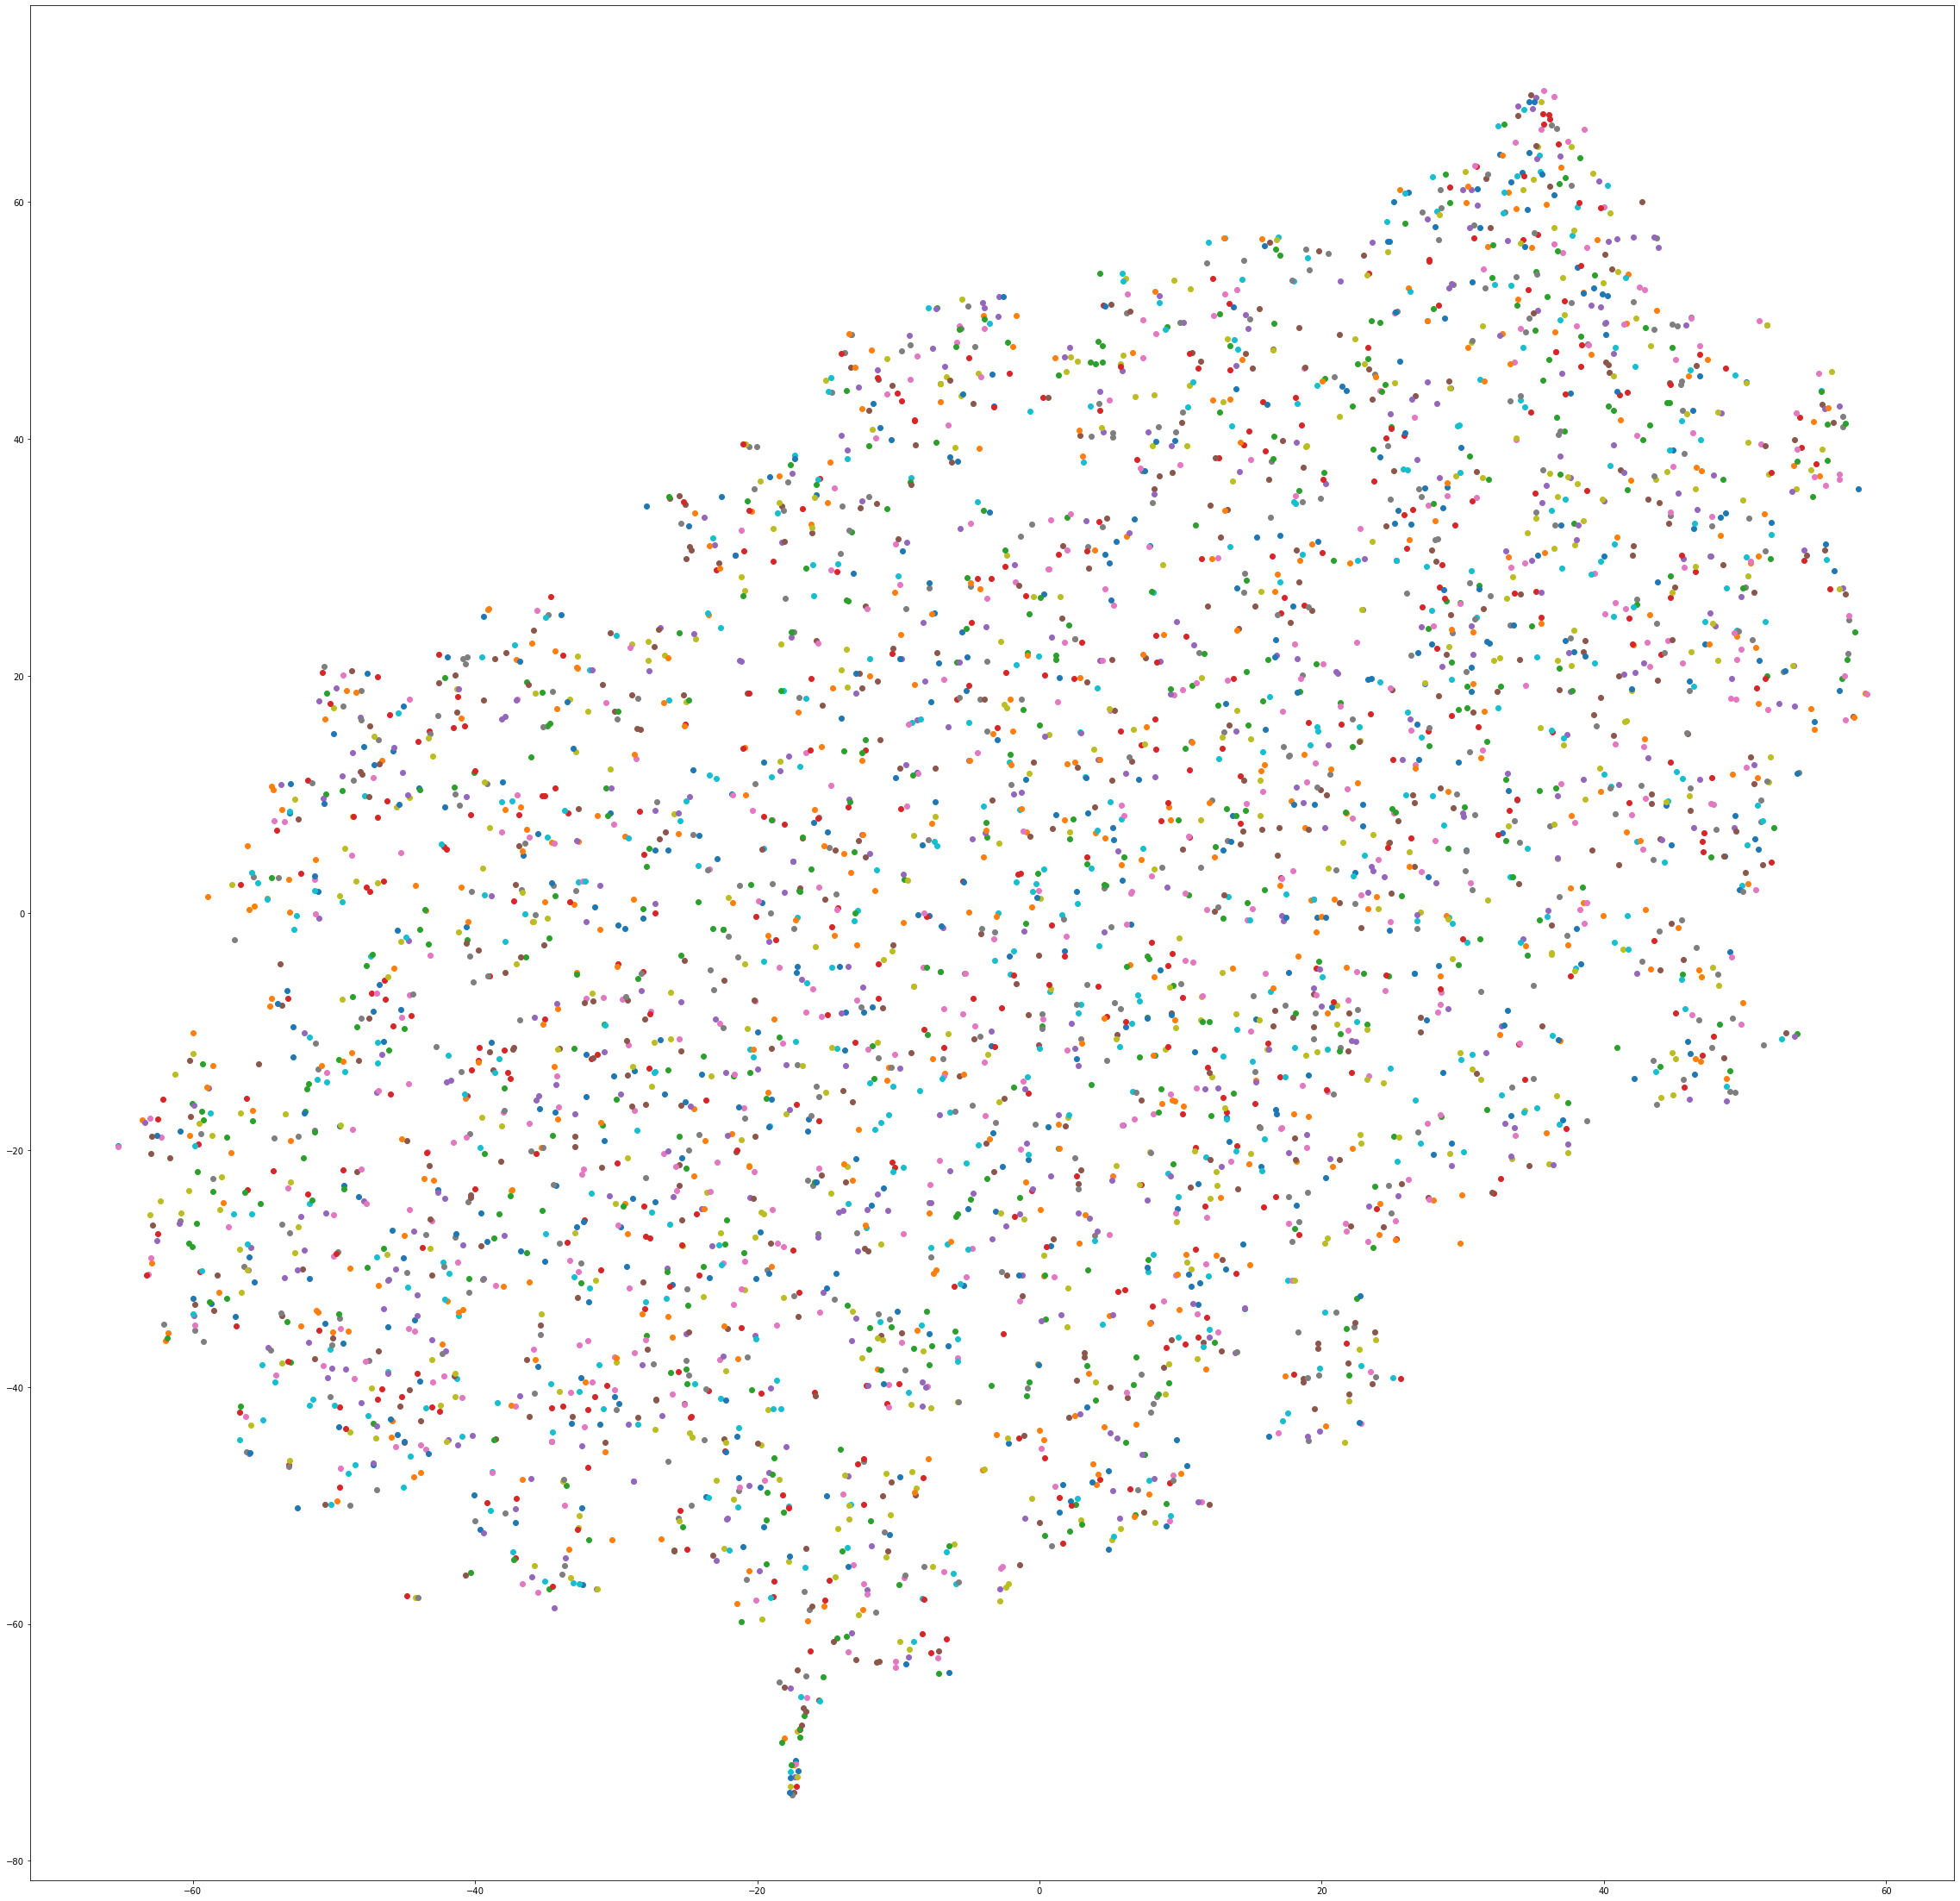

In [18]:
#t-SNE analysis
tsne=TSNE(n_components=2,random_state=0)
rev_2d=tsne.fit_transform(rev_clus)
target_ids=range(n)
tsne1_rev=[]
tsne2_rev=[]
for i in range(n):
    tsne1_rev.append(rev_2d[i][0])
    tsne2_rev.append(rev_2d[i][1])
plt.figure(figsize=(40,40))
for x,y,z in zip(tsne1_rev,tsne2_rev,industry):
    plt.scatter(x,y,label=z)
plt.legend
plt.show()